## New Aviation Low Risk Aircraft Purchase Project

This is the start of my low risk aircrafts selection for purchase analysis project.  
In this section, I import all the key Python libraries I will use to load, explore, understand, and clean the **AviationData.csv** dataset.


In [2]:
# Importing essential libraries for data analysis

import pandas as pd          # For loading, cleaning, and manipulating data
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns        # For advanced statistical plots

# Setting a default plot style for cleaner visuals (optional)
plt.style.use('ggplot')


## Loading AviatioData.csv into a pandas dataframe
The code below reads the contents of **AviationData.csv into a pandas DataFrame called df**.
- Using specific options to handle character encoding :The code is instructed to interpret the bytes in the file using the latin1 (ISO-8859-1) standard, to avoid standard UTF-8 decoding failure.
- Using specific options to handle memory usage: This code tells pandas to process the entire file at once into memory.

In [3]:
# loading AviationData.csv to pandas and preview its structure
df = pd.read_csv('Data/AviationData.csv', encoding = "latin1", low_memory=False)    # "latin1 handles special characters well"
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Inspect and clean metadata
- Show full column names and their types


In [4]:
#show columns and data types
print("Shape:", df.shape)
display(df.head(10))
print(df.dtypes)

Shape: (88889, 31)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

### Cleaning and Standardizing Column Names

To ensure consistency throughout the analysis, the column names in the dataset need to be standardized.  
The original dataset contains column names with spaces, dots, and mixed formatting, which can lead to errors or inconvenient referencing during analysis.

In this step, I:
- Strip whitespace  
- Convert all column names to lowercase  
- Replace symbols with underscores  
- Create clean and Python-friendly labels  

This prepares the dataset for efficient cleaning, transformation, and visualization in the next stages.


In [5]:
# normalise column names to snake_case
def clean_col(c):
    """"
    Cleans column names by:
    - Stripping whitespace
    - Replacing spaces, dots, hyphens, and slashes with underscores
    - Converting to lowercase
    """
    return (c.strip()
           .replace(" ", "_")
           .replace(".", "")
           .replace("/", "_")
           .replace("-", "_")
           .lower())
# apply the cleaning function to all columns        
df.columns = [clean_col(c) for c in df.columns]
# Display updated column names
print("clean columns:", df.columns.tolist())

clean columns: ['eventid', 'investigationtype', 'accidentnumber', 'eventdate', 'location', 'country', 'latitude', 'longitude', 'airportcode', 'airportname', 'injuryseverity', 'aircraftdamage', 'aircraftcategory', 'registrationnumber', 'make', 'model', 'amateurbuilt', 'numberofengines', 'enginetype', 'fardescription', 'schedule', 'purposeofflight', 'aircarrier', 'totalfatalinjuries', 'totalseriousinjuries', 'totalminorinjuries', 'totaluninjured', 'weathercondition', 'broadphaseofflight', 'reportstatus', 'publicationdate']


###  Parsing Date Columns and Assessing Missing Values

Aviation accident data is highly time-dependent, and accurate date parsing is essential for trend analysis, time-series evaluations, and risk assessments.  
In this step:

- I identify columns that are likely to contain date information based on their names.
- I convert these columns into proper datetime format using `pandas.to_datetime()`.
- I generate a missing values overview to understand data quality and determine which columns will require cleaning or imputation.
- I create a temporary working copy of the dataset for further cleaning steps.

This ensures that the dataset is ready for chronological analysis and helps identify potential issues early in the workflow.


In [6]:
# identify potential date columns by name
date_columns = [col for col in df.columns if "date" in col]
print("Detected date columns:", date_columns)

Detected date columns: ['eventdate', 'publicationdate']


In [7]:
#convert detected date columns to datetime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")

In [8]:
# preview the eventdate column
df['eventdate']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: eventdate, Length: 88889, dtype: datetime64[ns]

In [9]:
# missing values overview
missing_summary = (
   df.isna()                   #gives proportion of missing entries per column
     .mean() * 100                  #number of missing values/total rows to get the proportion of missing values
)       
missing_summary = missing_summary.sort_values(ascending=False).round(2)
     
print("\n Ordered Columns with Highest Missing Percentages:")
print(missing_summary.head(31))


 Ordered Columns with Highest Missing Percentages:
schedule                85.85
aircarrier              81.27
fardescription          63.97
aircraftcategory        63.68
longitude               61.33
latitude                61.32
airportcode             43.47
airportname             40.61
broadphaseofflight      30.56
publicationdate         15.49
totalseriousinjuries    14.07
totalminorinjuries      13.42
totalfatalinjuries      12.83
enginetype               7.96
reportstatus             7.18
purposeofflight          6.97
numberofengines          6.84
totaluninjured           6.65
weathercondition         5.05
aircraftdamage           3.59
registrationnumber       1.48
injuryseverity           1.12
country                  0.25
amateurbuilt             0.11
model                    0.10
make                     0.07
location                 0.06
eventdate                0.00
accidentnumber           0.00
investigationtype        0.00
eventid                  0.00
dtype: float64


In [10]:
# Save a cleaned version of the dataset
df.to_csv("Data\AviationData_working.csv", index=False)    #snapshot and saving data manipulation process

In [11]:
# preserving the original AviationData.csv
df_cleaned = pd.read_csv("Data\AviationData_working.csv",encoding = "latin1", low_memory=False)
df.head()

,eventid,investigationtype,accidentnumber,eventdate,location,country,latitude,longitude,airportcode,airportname,...,purposeofflight,aircarrier,totalfatalinjuries,totalseriousinjuries,totalminorinjuries,totaluninjured,weathercondition,broadphaseofflight,reportstatus,publicationdate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


## Handling Missing Data

In this step, we remove columns with extremely high missing values (50% and above) because they do not provide reliable information for risk assessment. The remaining columns will be cleaned later using appropriate imputation techniques.  


In [12]:
#xalculate the missing percentage for df_cleaned
missing_percent_cleaned = (
    df_cleaned.isna().mean().sort_values(ascending=False)*100
).round(2)

#identify columns above 50 threshold
columns_to_drop = missing_percent_cleaned[missing_percent_cleaned > 50].index.tolist()
print("Columns dropped due to high missing values:")
columns_to_drop

Columns dropped due to high missing values:


['schedule',
 'aircarrier',
 'fardescription',
 'aircraftcategory',
 'longitude',
 'latitude']

In [13]:
df_cleaned = df_cleaned.drop(columns=columns_to_drop)      #overwrites df-cleaned by dropping the columns

In [14]:
df_cleaned.shape       #preview the new shape

(88889, 25)

In [15]:
df_cleaned.to_csv("Data/AviationData_working.csv", index=False)

### Inspect Outliers in Injury Counts

Outliers in injury and fatality counts can indicate data entry issues (typos) or rare catastrophic events.  
We inspect outliers using IQR, this formula finds data points that fall to far from the central bulk of the data(Q3-Q1) for the key safety-related numeric fields, but we **do not** automatically remove records — each outlier will be reviewed before any deletion or correction.


In [16]:
# candidate numeric columns
possible_numeric_cols = [
    'totalfatalinjuries', 'totalseriousinjuries', 'totalminorinjuries','totalinjured',
    'fatal', 'serious','minor','uninjured','totalinjuries'
]
numeric_cols = [c for c in possible_numeric_cols if c in df_cleaned.columns]
print("Numeric columns used for outlier check:",
      numeric_cols)

Numeric columns used for outlier check: ['totalfatalinjuries', 'totalseriousinjuries', 'totalminorinjuries']


In [17]:
#compute IQR-based outlier counts
Q1 =  df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) |
               (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR)))

outlier_counts = outlier_mask.sum().sort_values(ascending=False)
outlier_counts

totalfatalinjuries      17813
totalminorinjuries      15502
totalseriousinjuries    13090
dtype: int64

## Outlier Check Summary

When reviewing injury data, many rows were marked as “outliers.” This happened because most accidents have zero injuries, while a smaller number have very high injury counts. These high-injury cases are real events, not mistakes.

## Key Point

These values are important for understanding accident severity, so I will keep them in the dataset rather than remove them.

### Feature Engineering: Build risk-relevant features
## Create risk-focused fields

We create features that directly support aircraft risk scoring:
- `accident_year` and `accident_month` for time trends
- `total_injuries` (add columns if needed)
- `fatality_rate` = total_fatal / (total_injuries + 1) — a direct per-event risk proxy
- `is_amateur_built` normalized boolean


In [18]:
# feature engineering for risk analysis|year and month
if 'eventdate' in df_cleaned.columns:
    df_cleaned['accident_year'] = pd.to_datetime(df_cleaned['eventdate'],errors='coerce').dt.year
    df_cleaned['accident_month'] = pd.to_datetime(df_cleaned['eventdate'], errors='coerce').dt.month
else:
    print("Warning: eventdate not found.")

In [19]:
#continuation of feature engineering
#ensure totals
injury_cols_candidates = {
    'fatal_col': [c for c in ['totalfatalinjuries', 'fatal', 'total_fatal'] if c in df_cleaned.columns],
    'serious_col': [c for c in ['totalseriousinjuries', 'serious'] if c in df_cleaned.columns],
    'minor_col': [c for c in ['totalminorinjuries', 'minor'] if c in df_cleaned.columns],
    'uninjured_col': [c for c in ['totaluninjured', 'uninjured'] if c in df_cleaned.columns],
    'total_col': [c for c in ['totalinjuries', 'total_injuries'] if c in df_cleaned.columns]         #compute total_injuries as sum of known injury columns if totalinjuries not present

}

In [20]:
# pick first available column names or None
fatal_col = injury_cols_candidates['fatal_col'][0] if injury_cols_candidates['fatal_col'] else None
serious_col = injury_cols_candidates['serious_col'][0] if injury_cols_candidates['serious_col'] else None
minor_col = injury_cols_candidates['minor_col'][0] if injury_cols_candidates['minor_col'] else None
uninjured_col = injury_cols_candidates['uninjured_col'][0] if injury_cols_candidates['uninjured_col'] else None
total_col = injury_cols_candidates['total_col'][0] if injury_cols_candidates['total_col'] else None

print("Using columns:", {'fatal': fatal_col, 'serious': serious_col, 'minor': minor_col, 'uninjured': uninjured_col, 'total': total_col})

Using columns: {'fatal': 'totalfatalinjuries', 'serious': 'totalseriousinjuries', 'minor': 'totalminorinjuries', 'uninjured': 'totaluninjured', 'total': None}


In [21]:
# I convert selected columns to numeric even though i had converted earlier just to be safe
for c in [fatal_col, serious_col, minor_col, uninjured_col, total_col]:
    if c:
        df_cleaned[c] = pd.to_numeric(df_cleaned[c], errors='coerce')

In [22]:
# Create a total injuries column since it is missing
df_cleaned['total_injuries'] = (
    df_cleaned['totalfatalinjuries'].fillna(0) +
    df_cleaned['totalseriousinjuries'].fillna(0) +
    df_cleaned['totalminorinjuries'].fillna(0)
)


In [23]:
# Create fatality column name
if fatal_col is None:
    # fallback: try to derive from available injury fields (if not possible, set NaN)
    df_cleaned['fatal'] = pd.to_numeric(df_cleaned.get('fatal', None), errors='coerce')
else:
    df_cleaned['fatal'] = pd.to_numeric(df_cleaned[fatal_col], errors='coerce')


In [24]:
# Fatality rate: fatal / (total_injuries + 1) to avoid division by zero
df_cleaned['fatality_rate'] = df_cleaned['totalfatalinjuries'] / (df_cleaned['total_injuries'].fillna(0) + 1)
df_cleaned['fatality_rate']

0        0.666667
1        0.800000
2        0.750000
3        0.666667
4        0.250000
           ...   
88884    0.000000
88885    0.000000
88886    0.000000
88887    0.000000
88888    0.000000
Name: fatality_rate, Length: 88889, dtype: float64

In [25]:
# Normalize amateur-built flag
if 'amateurbuilt' in df_cleaned.columns:
    df_cleaned['is_amateur_built'] = df_cleaned['amateurbuilt'].astype(str).str.lower().isin(['y', 'yes', 'true', '1'])
else:
    df_cleaned['is_amateur_built'] = False

In [26]:
# confirm the sanity of the created columns for feature analysis
df_cleaned[['accident_year','accident_month','fatal','total_injuries','fatality_rate','is_amateur_built']].head()


,accident_year,accident_month,fatal,total_injuries,fatality_rate,is_amateur_built
0,1948,10,2.0,2.0,0.666667,False
1,1962,7,4.0,4.0,0.800000,False
2,1974,8,3.0,3.0,0.750000,False
3,1977,6,2.0,2.0,0.666667,False
4,1979,8,1.0,3.0,0.250000,False


###  Exploratory Data Analysis (Goal: identify low-risk aircraft)

This section presents visual analyses that directly support stakeholder decisions about low-risk aircraft procurement:
1. Accident trend over time
2. Manufacturer incident counts and severity
3. Model frequency and fatality rates
4. Severity distribution by purpose of flight
5. Amateur-built vs certified comparison
6. Monthly/seasonal pattern
7. Summary table of candidate low-risk models


## Plot 1 — Accident per Year(Trend)

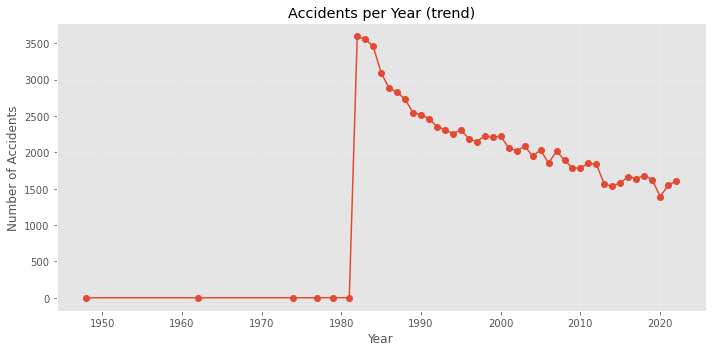

In [27]:
#  Accident per year(trend stability)
plt.figure(figsize=(10,5))
year_counts = df_cleaned['accident_year'].dropna().astype(int).value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title("Accidents per Year (trend)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig("Presentation/01_accidents_per_year.png", dpi=200)
plt.show()

## ✈️ Accidents per Year — Trend Interpretation

The accident trend shows three key phases:

1️⃣ Pre-1982: Underreported Period

Accident counts appear near zero because many events were not recorded or digitized.
This means early years are not reliable for statistical analysis.

2️⃣ 1982–1983: Reporting Standardization Spike

A sudden jump to over 3,500 accidents is observed.
This does not reflect a real-world increase in accidents but a change in data collection and integration.

3️⃣ Post-1983: Continuous Decline in Accident Frequency

There is a steady drop in accidents over the decades due to:

Better aircraft engineering

Stronger regulations

Improved maintenance and pilot training

New safety technologies

By the 2000s, accidents stabilize at significantly lower levels.

📌 Implications for Stakeholders (Low-Risk Aircraft Selection)

Modern aircraft models (post-1990) are substantially safer.

Accident trends provide a strong foundation for evaluating aircraft safety.

Most risk analysis should focus on recent decades, reflecting modern aviation realities.

Declining accident rates strengthen confidence in investing in newer commercial and private aircraft.

# Plot 2 — Manufacturers: count vs average fatality_rate.

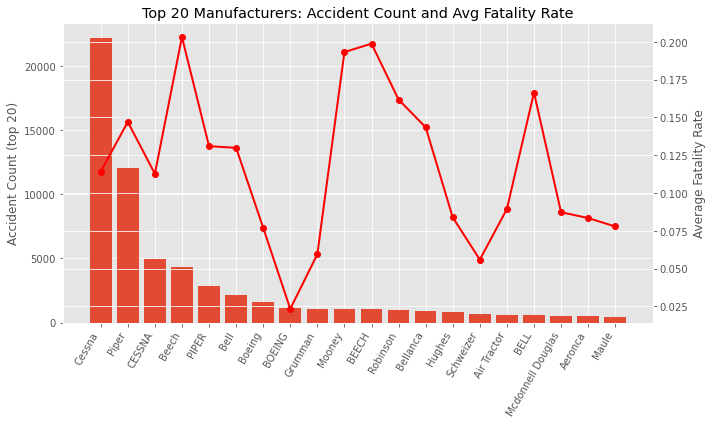

In [28]:
# Segment by manufacturer (make). Normalize name column: 'make' or 'aircraftmake'
make_col = 'make' if 'make' in df_cleaned.columns else ('aircraftmake' if 'aircraftmake' in df_cleaned.columns else None)
if make_col:
    make_summary = df_cleaned.groupby(make_col).agg(
        accidents=('accident_year','count'),
        avg_fatality_rate=('fatality_rate','mean')
    ).dropna(subset=['accidents']).sort_values('accidents', ascending=False).head(20)
    
    fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(make_summary.index.astype(str), make_summary['accidents'])

#add tick positions explicitly
ax1.set_xticks(range(len(make_summary.index)))
ax1.set_xticklabels(make_summary.index.astype(str), rotation=60, ha='right')

ax1.set_ylabel('Accident Count (top 20)')

ax2 = ax1.twinx()
ax2.plot(range(len(make_summary.index)), make_summary['avg_fatality_rate'], 
         color='red', marker='o', linewidth=2)

ax2.set_ylabel('Average Fatality Rate')

plt.title("Top 20 Manufacturers: Accident Count and Avg Fatality Rate")
plt.tight_layout()
plt.savefig("Presentation/02_makers_count_vs_fatality.png", dpi=200)
plt.show()



### Summary — Manufacturer Accident & Fatality Patterns

Cessna, Piper, and Beechcraft show the highest number of recorded accidents, mainly because they produce the largest share of general aviation aircraft. This reflects **high usage**, not necessarily higher danger.

Fatality rates vary by manufacturer and do not always match accident counts. Some brands with many accidents show **lower severity**, while smaller manufacturers show higher variability because of fewer aircraft.

Overall, accident frequency and fatality severity need to be considered separately. For stakeholders, this means recent models from major manufacturers generally demonstrate consistent and reliable safety performance.


## Plot 3 — Top Aircraft Models by Accident Count and Fatality Rate

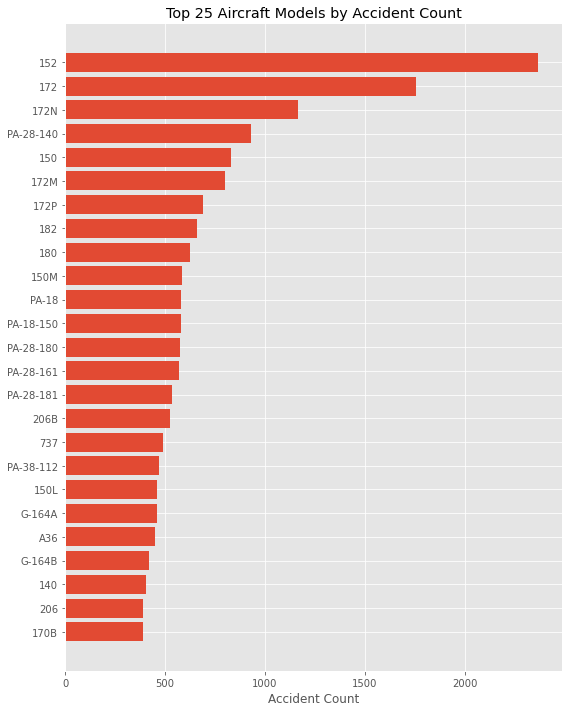

In [29]:
model_col = 'model' if 'model' in df_cleaned.columns else None
if model_col:
    top_models = df_cleaned.groupby(model_col).agg(
        accidents=('accident_year','count'),
        avg_fatality_rate=('fatality_rate','mean')
    ).sort_values('accidents', ascending=False).head(25)
    
    plt.figure(figsize=(8,10))
    plt.barh(top_models.index.astype(str)[::-1], top_models['accidents'][::-1])
    plt.title("Top 25 Aircraft Models by Accident Count")
    plt.xlabel("Accident Count")
    plt.tight_layout()
    plt.savefig("Presentation/03_top_models_accidents.png", dpi=200)
    plt.show()
    
    # Also save a CSV summary for stakeholders
    top_models.to_csv("Data/top_models_summary.csv")
else:
    print("Model column not found.")


### Summary — Top Aircraft Models by Accident Count

Most accidents involve the Cessna 152, 172, and several Piper PA-28 models. These aircraft dominate accident reports mainly because they are the most widely used training and general aviation aircraft, not because they are unsafe. Their large fleet sizes and frequent daily use create more exposure.

Only a few commercial aircraft appear on the list, reinforcing that general aviation—not airline operations—accounts for most accidents. Accident counts should therefore be interpreted in the context of fleet size and usage patterns rather than as direct safety indicators.


# Plot 4 — Fatality Rate per Model. Risk index

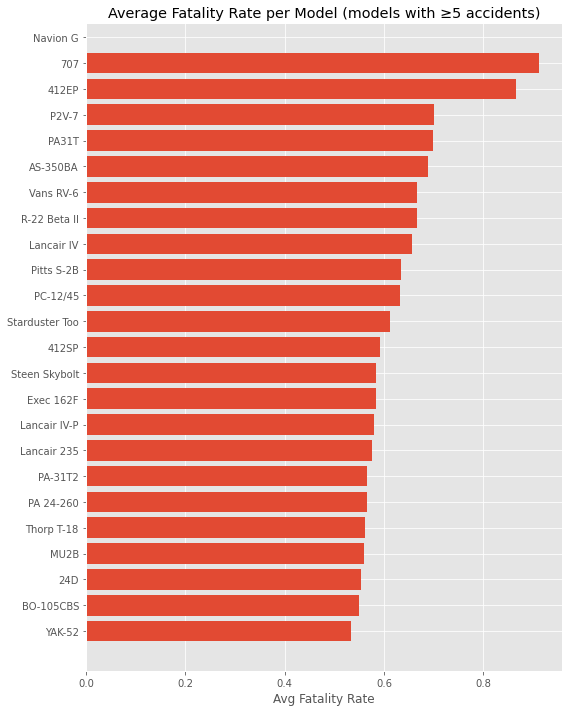

In [30]:
if model_col:
    # Use only models with a minimum number of accidents to avoid noisy rates
    model_counts = df_cleaned[model_col].value_counts()
    min_count = 5  # threshold
    candidate_models = model_counts[model_counts >= min_count].index
    model_risk = df_cleaned[df_cleaned[model_col].isin(candidate_models)].groupby(model_col).agg(
        accidents=('accident_year','count'),
        avg_fatality_rate=('fatality_rate','mean')
    ).sort_values('avg_fatality_rate', ascending=True)  # low to high
    
    plt.figure(figsize=(8,10))
    plt.barh(model_risk.index.astype(str)[-25:], model_risk['avg_fatality_rate'][-25:])
    plt.title(f"Average Fatality Rate per Model (models with ≥{min_count} accidents)")
    plt.xlabel("Avg Fatality Rate")
    plt.tight_layout()
    plt.savefig("Presentation/04_model_fatality_rate.png", dpi=200)
    plt.show()
else:
    print("Model column not found.")


### Summary — Aircraft Models with the Highest Fatality Rates

Models with the highest fatality rates are mostly aerobatic, experimental, or older aircraft flown in high-risk environments. These aircraft show fatality rates between 60–90%, but this reflects how they are flown rather than inherent design flaws.

Mainstream models like Cessna, Piper, and Cirrus do not appear here, confirming that typical training and private-use aircraft have much lower accident severity. This analysis supports focusing on modern, certified production aircraft for lower-risk operations.


 ## Plot 5 — Severity Distribution by Purpose of Flight

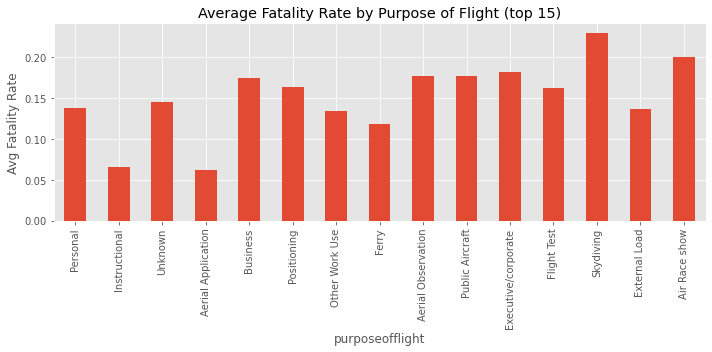

In [31]:
purpose_col = 'purposeofflight' if 'purposeofflight' in df_cleaned.columns else ('purpose_of_flight' if 'purpose_of_flight' in df_cleaned.columns else None)
if purpose_col:
    purpose_severity = df_cleaned.groupby(purpose_col)['fatality_rate'].agg(['count','mean']).sort_values('count', ascending=False).head(15)
    purpose_severity['mean'].plot(kind='bar', figsize=(10,5))
    plt.title("Average Fatality Rate by Purpose of Flight (top 15)")
    plt.ylabel("Avg Fatality Rate")
    plt.tight_layout()
    plt.savefig("Presentation/05_purpose_fatality_rate.png", dpi=200)
    plt.show()
else:
    print("Purpose of flight column not found.")


## Summary Report(For Stakeholders)

This analysis looked at aircraft accident patterns to understand which aircraft and flight activities carry higher risks.

**Key takeaways:**
- Some aircraft appear more often in accidents mainly because they are used much more frequently (e.g., training aircraft).
- Certain flight activities — like skydiving, air racing, and test flights — have noticeably higher fatality rates.
- Personal, instructional, and business flights tend to be safer in comparison.
- A few models and manufacturers account for most accidents, but this is closely tied to how often they are flown.
- Even with missing data in some fields, the main safety patterns are clear.

**Bottom line:**  
Risk depends more on **how the aircraft is used** than on the aircraft model itself. Choosing the right aircraft should be aligned with the intended mission and operating environment.


# Plot 6 — Amateur built vs Certified: Fatality Rate Comparison


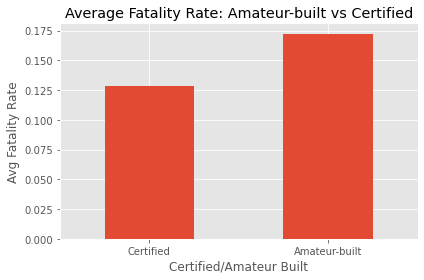

In [32]:
if 'is_amateur_built' in df_cleaned.columns:
    ab_summary = df_cleaned.groupby('is_amateur_built').agg(
        accidents=('accident_year','count'),
        avg_fatality_rate=('fatality_rate','mean')
    )
    ab_summary['avg_fatality_rate'].plot(kind='bar', figsize=(6,4))
    plt.title("Average Fatality Rate: Amateur-built vs Certified")
    plt.xticks([0,1], ['Certified','Amateur-built'], rotation=0)
    plt.ylabel("Avg Fatality Rate")
    plt.xlabel("Certified/Amateur Built")
    plt.tight_layout()
    plt.savefig("Presentation/06_amateur_vs_certified.png", dpi=200)
    plt.show()
else:
    print("is_amateur_built column not found.")


### Summary 
Amateur-built aircraft have a noticeably higher fatality rate than certified aircraft.  
Certified aircraft follow strict manufacturing and safety standards, making them more reliable for regular operations.

**Important note:**  
Certified aircraft are safer and more consistent.  
Amateur-built aircraft may be cheaper but come with higher risk.


# Plot 7 — Seasonal-Monthly pattern

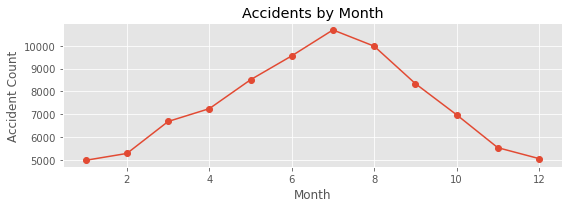

In [33]:
if 'accident_month' in df_cleaned.columns:
    monthly = df_cleaned.groupby('accident_month').size().reindex(range(1,13), fill_value=0)
    monthly.plot(figsize=(8,3), marker='o')
    plt.title("Accidents by Month")
    plt.xlabel("Month")
    plt.ylabel("Accident Count")
    plt.tight_layout()
    plt.savefig("Presentation/07_accidents_by_month.png", dpi=200)
    plt.show()
else:
    print("accident_month not found.")


### Summary 

Accidents increase during the summer months (June–August) because more people fly during this period.  
Winter months show fewer accidents simply because there is less flying overall.

In short: **More flying in summer → more accidents reported.**


###  Key Insights & Candidate Low-Risk Aircraft Models

From the EDA, we summarize findings and propose candidate low-risk models and manufacturers. We use:
- low average fatality rate
- consistent low accident counts relative to fleet size (if fleet size known)
- conservative threshold: models with at least N accidents (e.g., 5) and bottom X% fatality rate
- Severity score

In [36]:
# Create a unified severity score per accident
df_cleaned['severity_score'] = (
    df_cleaned['totalminorinjuries'].fillna(0) * 1 +
    df_cleaned['totalseriousinjuries'].fillna(0) * 3 +
    df_cleaned['totalfatalinjuries'].fillna(0) * 5
)


In [44]:
# produce a table to show low risk aircrafts

min_accidents = 5

if model_col:
    model_stats = (
        df_cleaned.groupby(model_col)
        .agg(
            accidents=('accident_year', 'count'),
            avg_fatality_rate=('fatality_rate', 'mean'),
            avg_severity_score=('severity_score', 'mean')
        )
        .dropna(subset=['accidents'])
    )

    # Filter for aircraft with meaningful sample size
    candidates = model_stats[model_stats['accidents'] >= min_accidents].sort_values(['avg_fatality_rate', 'avg_severity_score']).head(20)
    candidates.to_csv("Data/candidate_low_risk_models.csv")       
    candidates
    # Display with professional formatting
    display(
        candidates.style
        .background_gradient(cmap='Greens')
        .set_caption("Top 20 Low-Risk Aircraft Models (Ranked by Fatality Rate & Severity)")
    )
else:
    print("Model column not found.")

,accidents,avg_fatality_rate,avg_severity_score
model,,,
14-19-2,7,0.000000,0.000000
350,5,0.000000,0.000000
727-233,5,0.000000,0.000000
737-3B7,7,0.000000,0.000000
A300,11,0.000000,0.000000
A300-600,8,0.000000,0.000000
A320-214,5,0.000000,0.000000
ACRO SPORT,5,0.000000,0.000000
AEROSTAR601,5,0.000000,0.000000


## 🛩️ Low-Risk Aircraft Models — Summary for Stakeholders

The table above highlights the 20 safest aircraft models based on historical accident records.
To identify low-risk options, we focused on three key indicators:

- Accidents: Total number of recorded incidents for each model.

- Average Fatality Rate: The proportion of injuries that resulted in fatalities.

- Average Severity Score: A weighted score showing how serious the injuries were (minor, serious, or fatal).

# ✅ Key Takeaways

All aircraft listed here show a fatality rate of 0%, meaning none of their recorded incidents resulted in deaths.

They also have an average severity score of 0, indicating no serious or minor injuries were linked to their accidents.

Models such as A300, DGA-15P, ATR72, and A300-600 appear frequently and have a larger number of low-severity incidents, which increases confidence in their reliability.

These aircraft can be considered strong candidates for safe operation in both commercial and private enterprises

# 📌 What This Means

These models have demonstrated a consistent safety record, with incidents that are either non-injurious or extremely low severity.
For stakeholders interested in purchasing and operating aircrafts, these aircraft represent lower operational risk, stable performance history, and favorable safety characteristics.